<a id="TOP"><a>
# Workflow Demo

TBA
    
---
    
- 0. [Import Packages](#import_packages)
- 1. [Define the class to fill particle information in to NumpyArray](#define_class) 
- 2. [Define Functions](#define_function) 
- 3. [Define Function for `Event_List`](#event_list)  
- 4. [Import ROOT File](#import_file)
- 5. [Print the Branch in the Delphes](#delphes_tree)  
- 6. [Loading Event](#loading_event)
- 7. [Let's do Jet Clustering!!](#jet_clustering)
- 8. [Print Jets in the Nth event](#jets_in_nth_event)
- 9. [Print the Truth Record in an Event](#truth_record)

---
    
Ref: [pyjet](https://github.com/scikit-hep/pyjet)
    
    
[NBViewer](https://nbviewer.jupyter.org/github/alan200276/Universality_Boosetd_Higgs/blob/main/Notebook/workflow_demo.ipynb)

<a id="import_packages"><a>
## Import Packages
    
[Back to the top](#TOP)

In [1]:
import uproot
import pyjet
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import importlib
import time
from tqdm import tqdm

import logging

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)




from BranchClass import *

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


<a id="define_class"><a>
## Define the class to fill particle information in to NumpyArray     

    
 User can use 
```
GenParticles = BrachGenParticles(file)
PID_all = GenParticles.PID
```
to get all GenParticles PID array
or
```
GenParticles = BrachGenParticles(file)
PID = GenParticles.PID_At(i)
```
to get the GenParticles PID array in the ith event
    
More function can be found in `BranchClass.py`.
    
[Back to the top](#TOP)

<a id="define_function"><a>
## Define Functions 

[Back to the top](#TOP)

In [2]:
def M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)

def Mbbbb(j1,j2,j3,j4):
    pt1, eta1, phi1, m1 = j1.pt,j1.eta,j1.phi,j1.mass
    pt2, eta2, phi2, m2 = j2.pt,j2.eta,j2.phi,j2.mass
    pt3, eta3, phi3, m3 = j3.pt,j3.eta,j3.phi,j3.mass
    pt4, eta4, phi4, m4 = j4.pt,j4.eta,j4.phi,j4.mass
    
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    px3, py3, pz3 = pt3*np.cos(phi3), pt3*np.sin(phi3), np.sqrt(m3**2+pt3**2)*np.sinh(eta3)
    e3 = np.sqrt(m3**2 + px3**2 + py3**2 + pz3**2)
    px4, py4, pz4 = pt4*np.cos(phi4), pt4*np.sin(phi4), np.sqrt(m4**2+pt4**2)*np.sinh(eta4)
    e4 = np.sqrt(m4**2 + px4**2 + py4**2 + pz4**2)
    
    return np.sqrt((e1+e2+e3+e4)**2-(px1+px2+px3+px4)**2-(py1+py2+py3+py4)**2-(pz1+pz2+pz3+pz4)**2)

def MJJ(j1,j2):
    pt1, eta1, phi1, m1 = j1.pt,j1.eta,j1.phi,j1.mass
    pt2, eta2, phi2, m2 = j2.pt,j2.eta,j2.phi,j2.mass
    
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    return np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)


def MT(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2,missingET,missingETA,missingPHI):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    px_missing, py_missing = missingET*np.cos(missingPHI), missingET*np.sin(missingPHI)
    
    EllT = np.sqrt((px1+px2)**2 + (py1+py2)**2 +  M(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2)**2 )

    MT = np.sqrt( (EllT+missingET)**2 - (px1+px2+px_missing)**2 - (py1+py2+py_missing)**2 )
    
    return MT
    
def PxPyPzE(pt,eta,phi,m):
    px, py, pz = pt*np.cos(phi), pt*np.sin(phi), np.sqrt(m**2+pt**2)*np.sinh(eta)
    e = np.sqrt(m**2 + px**2 + py**2 + pz**2)
    
    return px, py, pz, e    

def PtEtaPhiM(px, py, pz, e):
    E, px ,py, pz = e, px, py, pz  
    P = np.sqrt(px**2 + py**2 + pz**2)
    pt = np.sqrt(px**2 + py**2)
    eta = 1./2.*np.log((P + pz)/(P - pz))
    phi = np.arctan(py/px)
    m = np.sqrt(np.sqrt((E**2 - px**2 - py**2 - pz**2)**2))

    return pt, eta, phi, m

def ET(jet):
    pt = jet.pt
    m = jet.mass
    ET = np.sqrt(m**2 + pt**2)
    return  ET


def XHH(jet1, jet2):
    m1, m2 = jet1.mass, jet2.mass
    XHH = np.sqrt( (m1-124)**2/(0.1*m1) + (m2-115)**2/(0.1*m2))
    return  XHH

def DeltaR(eta1,phi1, eta2,phi2):
    dEta = eta1-eta2
    dPhi = abs(phi1-phi2)
    if dPhi > np.pi:
        dPhi = 2*np.pi - dPhi

    dR = (dPhi**2 + dEta**2)**0.5

    return dR

def FourVectorbb(pt1,eta1,phi1,m1,pt2,eta2,phi2,m2):
    px1, py1, pz1 = pt1*np.cos(phi1), pt1*np.sin(phi1), np.sqrt(m1**2+pt1**2)*np.sinh(eta1)
    e1 = np.sqrt(m1**2 + px1**2 + py1**2 + pz1**2)
    px2, py2, pz2 = pt2*np.cos(phi2), pt2*np.sin(phi2), np.sqrt(m2**2+pt2**2)*np.sinh(eta2)
    e2 = np.sqrt(m2**2 + px2**2 + py2**2 + pz2**2)
    
    m = np.sqrt((e1+e2)**2-(px1+px2)**2-(py1+py2)**2-(pz1+pz2)**2)
    pt = np.sqrt((px1+px2)**2 + (py1+py2)**2)
    eta = np.arcsinh((pz1+pz2)/np.sqrt(m**2+pt**2))
    phi = np.arcsin((py1+py2)/pt)
    
    return pt, eta, phi, m


def jet_trim(jet0, pt_cut= 0.05, R1 = 0.2):
    # Define a cut threshold that the subjets have to meet (i.e. 3% of the original jet pT)
    jet0_max = jet0.pt
    jet0_cut = jet0_max*pt_cut

    # Grab the subjets by clustering with R1
    subjets = pyjet.cluster(jet0.constituents_array(), R=R1, p=1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
    subjet_array = subjets.inclusive_jets()
    j0 = []
    if (subjet_array[0].pt >= jet0_cut):
        for ij, subjet in enumerate(subjet_array):
            if subjet.pt < jet0_cut:
                # subjet doesn't meet the percentage cut on the original jet pT
                continue
            if subjet.pt >= jet0_cut:
                # Get the subjets pt, eta, phi constituents
                subjet_data = subjet.constituents_array()
                j0.append(subjet_data)
    else:
        j0 = subjet_array[0].constituents_array()*0
    jet = j0[0]
    for i, subjet in enumerate(j0):
        if i==0 :
            continue
        jet = np.append(jet, subjet)
        
    sequence = pyjet.cluster(jet, R=1.0, p=-1)
    jet = sequence.inclusive_jets()
    return jet


def digit(loc,pid):
    #     //  PID digits (base 10) are: n nr nl nq1 nq2 nq3 nj
    #     //   nj = 1, nq3=2 , nq2=3, nq1, nl, nr, n, n8, n9, n10 
    #     //  the location enum provides a convenient index into the PID
    numerator = 10**(loc-1)
    
    return int((abs(pid)/numerator)%10)

def hasBottom(pid):
    # get B hadron
    # PID for B hadron are 5XX, 5XXX
    # https://gitlab.com/hepcedar/rivet/-/blob/release-3-1-x/analyses/pluginCMS/CMS_2015_I1370682.cc#L390
    # https://rivet.hepforge.org/code/2.1.0/a00827.html#ad4c917595339ea52152c2950ce1225e7
    # https://pdg.lbl.gov/2019/reviews/rpp2019-rev-monte-carlo-numbering.pdf
    if( digit(2,pid) == 5 or digit(3,pid) == 5 or digit(4,pid) == 5 ):
        return True
    else:
        return False



<a id="event_list"><a>
## Define Function for `Event_List`

[Back to the top](#TOP)

In [3]:
def Event_List(GenParticle):
#     print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
    ticks_1 = time.time()
    
    k = 0
    bbbb_list = []
    event_list = []
    bb1_P4, bb2_P4 = [], []
    Mbbbb = []
    bhadron_list = []
    for N in tqdm(range(GenParticle.length)):

        event_list_tmp = []
        
        event_list_tmp.append([GenParticle.PT_At(N),  GenParticle.Eta_At(N), \
                               GenParticle.Phi_At(N), GenParticle.Mass_At(N), \
                               GenParticle.PID_At(N), GenParticle.Status_At(N),\
                               GenParticle.Charge_At(N),\
                               np.full(len(GenParticle.PT_At(N)),0), #for B hadron tag
                               GenParticle.M1_At(N), GenParticle.M2_At(N),\
                               GenParticle.D1_At(N), GenParticle.D2_At(N),\
                               
                              ])
        
        event_list_tmp = np.array(event_list_tmp)
        
    
        """
        Find All B Hadrons
        """
        unstable_hadron = event_list_tmp[0][:,np.abs(event_list_tmp[0][5,:])==2]
        bhadron_index = np.where(np.vectorize(hasBottom)(unstable_hadron[4,:])==True)[0] 
        bhadron = unstable_hadron[:,bhadron_index]
        bhadron_list_tmp = []
        
        """
        Find B Hadrons before decay
        """
        for i in range(len(bhadron[0])):   
            if hasBottom(GenParticle.PID_At(N)[int(bhadron[10][i])]) == False and hasBottom(GenParticle.PID_At(N)[int(bhadron[11][i])]) == False:
                bhadron_list_tmp.append(bhadron[:,i])
        
        """
        Ghost Association Method: create ghost-associated B Hadrons
        """
        Ghostparam = 1E-20
        for i, element in enumerate(bhadron_list_tmp):
            bhadron_list_tmp[i][0] = element[0]*Ghostparam  # PT*Ghostparam
            bhadron_list_tmp[i][3] = element[3]*Ghostparam  # Mass*Ghostparam
            bhadron_list_tmp[i][7] = 1                      #B Hadron tag 
        
        """
        Pick stable final state particel (status = 1) and filter ou neutrinos (|PID| = 12, 14, 16)
        """
        event_list_tmp = event_list_tmp[0][:,event_list_tmp[0][5,:]==1] 
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=12]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=14]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=16]
        
        """
        Ghost Association Method: add ghost-associated B Hadrons
        """
        if len(bhadron_list_tmp) != 0:
            event_list_tmp = np.concatenate((np.array(event_list_tmp).transpose(),bhadron_list_tmp)).transpose()
            
        else:
            event_list_tmp = np.array(event_list_tmp)
        
        event_list.append(event_list_tmp)
        
        
        k += 1
        if k == 10000:
            break
        
    ticks_2 = time.time()
    totaltime =  ticks_2 - ticks_1
    print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
    
    return event_list

<a id="import_file"><a>
## Import ROOT File

[Back to the top](#TOP)

In [4]:
path = "/home/u5/Universality_Boosetd_Higgs/"

process_path_herwig_angular_H = path + "Herwig_angular/ggHj_herwig_ang_1.root"
# process_path_pythia_default_H =  path + "Pythia_default/ppHhh_pythia_def_1.root"
# process_path_pythia_vincia_H = path + "Pythia_vincia/ppHhh_pythia_vin_1.root"
# process_path_pythia_dipole_H = path + "Pythia_dipole/ppHhh_pythia_dip_1.root"
# process_path_sherpa = "./Data_root/ppwz_sherpa.root"

process_path_herwig_angular_QCD = path + "Herwig_angular/ppjj_herwig_ang_1.root"
# process_path_pythia_default_QCD = path + "Pythia_default/ppbbbb_pythia_def_1.root"
# process_path_pythia_vincia_QCD = path + "Pythia_vincia/ppbbbb_pythia_vin_1.root"
# process_path_pythia_dipole_QCD = path + "Pythia_dipole/ppbbbb_pythia_dip_1.root"
# process_path_sherpa_QCD = "./Data_root/ppjj_sherpa.root"




try:
    herwig_angular_H = uproot.open(process_path_herwig_angular_H)["Delphes;1"]
#     pythia_default_H = uproot.open(process_path_pythia_default_H)["Delphes;1"]
#     pythia_vincia_H = uproot.open(process_path_pythia_vincia_H)["Delphes;1"]
#     pythia_dipole_H = uproot.open(process_path_pythia_dipole_H)["Delphes;1"]
#     sherpa = uproot.open(process_path_sherpa)["Delphes;1"]
    
    herwig_angular_QCD = uproot.open(process_path_herwig_angular_QCD)["Delphes;1"]
#     pythia_default_QCD = uproot.open(process_path_pythia_default_QCD)["Delphes;1"]
#     pythia_vincia_QCD = uproot.open(process_path_pythia_vincia_QCD)["Delphes;1"]
#     pythia_dipole_QCD = uproot.open(process_path_pythia_dipole_QCD)["Delphes;1"]
#     sherpa_QCD = uproot.open(process_path_sherpa_QCD)["Delphes;1"]
    
    
#     process_list = [pythia_default, pythia_vincia, pythia_dipole]
    
    print("All Files are loaded!")
    
except:
    print("Please Check Input Files")


All Files are loaded!


<a id="delphes_tree"><a>
##  Print the Branch in the Delphes

[Back to the top](#TOP)

In [5]:
# pythia_default.show()

<a id="loading_event"><a>
## Loading Event 

[Back to the top](#TOP)

In [7]:
# importlib.reload(BranchClass)

GenParticle_herwig_angular_H = BranchGenParticles(herwig_angular_H)
Event_List_herwig_angular_H = Event_List(GenParticle_herwig_angular_H)

# GenParticle_pythia_default_H = BranchGenParticles(pythia_default_H)
# Event_List_pythia_default_H = Event_List(GenParticle_pythia_default_H)

# GenParticle_pythia_vincia_H = BranchGenParticles(pythia_vincia_H)
# Event_List_pythia_vincia_H = Event_List(GenParticle_pythia_vincia_H)

# GenParticle_pythia_dipole_H = BranchGenParticles(pythia_dipole_H)
# Event_List_pythia_dipole_H = Event_List(GenParticle_pythia_dipole_H)
# GenParticle_sherpa = BrachGenParticles(sherpa)
# Event_List_sherpa = Event_List(GenParticle_sherpa)


GenParticle_herwig_angular_QCD = BranchGenParticles(herwig_angular_QCD)
Event_List_herwig_angular_QCD = Event_List(GenParticle_herwig_angular_QCD)
# GenParticle_pythia_default_QCD = BranchGenParticles(pythia_default_QCD)
# Event_List_pythia_default_QCD = Event_List(GenParticle_pythia_default_QCD)
# GenParticle_pythia_vincia_QCD = BranchGenParticles(pythia_vincia_QCD)
# Event_List_pythia_vincia_QCD = Event_List(GenParticle_pythia_vincia_QCD)
# GenParticle_pythia_dipole_QCD = BranchGenParticles(pythia_dipole_QCD)
# Event_List_pythia_dipole_QCD = Event_List(GenParticle_pythia_dipole_QCD)
# GenParticle_sherpa_QCD = BranchGenParticles(sherpa_QCD)
# Event_List_sherpa_QCD = Event_List(GenParticle_sherpa_QCD)



Thu Jun 10 13:21:55 2021
Time Cost : 0.5775 min
Thu Jun 10 13:24:07 2021
Time Cost : 0.5913 min


In [8]:
# print(len(GenParticle_pythia_dipole_H.Status))

<a id="jet_clustering"><a>
## Let's do Jet Clustering!!
### We use ` np.core.records.fromarrays` to assign the name of kinematic variables and PID
### In `pyjet`, the data type are only 
`
np.dtype([('pT', 'f8'), ('eta', 'f8'), ('phi', 'f8'), ('mass', 'f8')])
`
### or (cluster(..., ep=True))
`
np.dtype([('E', 'f8'), ('px', 'f8'), ('py', 'f8'), ('pz', 'f8')])  
`
### In this example, we use `(pt, eta, phi and mass)`.
### After assigning the name for our each event list, the `pyjet.cluster` and `inclusive_jets` will help us do jet clustering.
`
sequence_cluster = pyjet.cluster(to_cluster, R = 1.0,p = -1)
jets_cluster = sequence_cluster.inclusive_jets(pt_min)
`
#### Variable: `R` is the cone size of the jet.
#### Variable: `p` is the jet clustering algorithm. `-1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt`
#### Variable: `pt_min` is the minimum jet's pt.

[Back to the top](#TOP)

In [9]:
process_list = [
              Event_List_pythia_default_H,
              Event_List_pythia_default_QCD,
             ]



process_list_clustered = []
Higgs_candidate = []
two_B_tag = []

four_b_tag, Higgs_candidate_4b = [], []
three_b_tag, Higgs_candidate_3b = [], []
two_b_tag, Higgs_candidate_2b = [], []

for i in range(len(process_list)):
    process_list_clustered.append([])
    Higgs_candidate.append([])
    two_B_tag.append([])
    
    four_b_tag.append([])
    Higgs_candidate_4b.append([])
    three_b_tag.append([])
    Higgs_candidate_3b.append([])
    two_b_tag.append([])
    Higgs_candidate_2b.append([])
    
ticks_1 = time.time()
counter = 0

for N, process in enumerate(process_list):
    
    for i in tqdm(range(len(process))):

        """
        Jet clustering 
        Fat jet: R = 1
        Anti-kt
        """
        to_cluster = np.core.records.fromarrays(process[i][:8], 
                                                names="pt, eta, phi, mass, PID, Status, Charge, B_tag",
                                                formats = "f8, f8, f8, f8, f8, f8, f8, f8"
                                               )
        pt_min = 25
        sequence_cluster = pyjet.cluster(to_cluster, R = 1, p = -1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
        jets_cluster = sequence_cluster.inclusive_jets(pt_min)
        process_list_clustered[N].append(jets_cluster)

        
        """
        4b category: have two $b$-tagged jets associated with each $H$ candidate
        """
        Higgs_candidate_tmp = []
        if len(jets_cluster) >=2:
            for jet in jets_cluster[:2]:
                B_tag = 0
                for constituent in jet:
                    if constituent.B_tag == 1:
                        B_tag += 1
                if B_tag >= 2:
                    Higgs_candidate_tmp.append(jet)
                
        if len(Higgs_candidate_tmp) >= 2:
            Higgs_candidate_4b[N].append(Higgs_candidate_tmp)
            four_b_tag[N].append(1)

        else:
            four_b_tag[N].append(0)
                
                
        """
        3b category: have two $b$-tagged jets associated with one $H$ candidate 
        and exactly one $b$-tagged jet associated with the other $H$ candidate.
        """
        Higgs_candidate_tmp_2b, Higgs_candidate_tmp_1b = [], []
        if len(jets_cluster) >=2:
            B_tag = 0
            for constituent in jets_cluster[0]:
                if constituent.B_tag == 1:
                    B_tag += 1
            if B_tag >= 2:
                Higgs_candidate_tmp_2b.append(jets_cluster[0])
                
            B_tag = 0
            for constituent in jets_cluster[1]:
                if constituent.B_tag == 1:
                    B_tag += 1
            if B_tag >= 2:
                Higgs_candidate_tmp_2b.append(jets_cluster[1])
                
            B_tag = 0
            for constituent in jets_cluster[0]:
                if constituent.B_tag == 1:
                    B_tag += 1
            if B_tag == 1:
                Higgs_candidate_tmp_1b.append(jets_cluster[0])
                
            B_tag = 0  
            for constituent in jets_cluster[1]:
                if constituent.B_tag == 1:
                    B_tag += 1
            if B_tag == 1:
                Higgs_candidate_tmp_1b.append(jets_cluster[1])
            
                
        if len(Higgs_candidate_tmp_2b) == 1 and len(Higgs_candidate_tmp_1b) == 1:
            Higgs_candidate_3b[N].append([Higgs_candidate_tmp_2b[0],Higgs_candidate_tmp_1b[0]])
            three_b_tag[N].append(1)

        else:
            three_b_tag[N].append(0)

            
        """
        2b category: have exactly one $b$-tagged jet associated with each $H$ candidate
        """
        Higgs_candidate_tmp = []
        if len(jets_cluster) >=2:
            for jet in jets_cluster[:2]:
                B_tag = 0
                for constituent in jet:
                    if constituent.B_tag == 1:
                        B_tag += 1
                if B_tag == 1:
                    Higgs_candidate_tmp.append(jet)
                
        if len(Higgs_candidate_tmp) >= 2:
            Higgs_candidate_2b[N].append(Higgs_candidate_tmp)
            two_b_tag[N].append(1)

        else:
            two_b_tag[N].append(0)
        
    #     counter += 1 
    #     if counter == 1000:
    #         break

    
print("There are {} events (process_list_clustered).".format(len(process_list_clustered)))
print("There are {} events (4b Higgs_candidate).".format(len(Higgs_candidate_4b)))
print("There are {} events (3b Higgs_candidate).".format(len(Higgs_candidate_3b)))
print("There are {} events (2b Higgs_candidate).".format(len(Higgs_candidate_2b)))    

ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))

Thu Jun 10 13:24:43 2021
Time Cost : 1.4479 min
Thu Jun 10 13:26:10 2021
Time Cost : 1.5268 min


In [90]:
for i in range(len(process_list)):
    if i % 2 == 0:
        print("H signal")
    elif i % 2 == 1:
        print("QCD bkg")

    print("There are {} events (process_list_clustered).".format(len(process_list_clustered[i])))
    print("There are {} events (4b Higgs_candidate).".format(len(Higgs_candidate_4b[i])))
    print("There are {} events (3b Higgs_candidate).".format(len(Higgs_candidate_3b[i])))
    print("There are {} events (2b Higgs_candidate).".format(len(Higgs_candidate_2b[i])))   

    print("Sum over category : ",len(Higgs_candidate_4b[i])+len(Higgs_candidate_3b[i])+len(Higgs_candidate_2b[i]))



2

<a id="jets_in_nth_event"><a>
## Print Jets in the Nth event

[Back to the top](#TOP)

In [ ]:
index = 0
N = 0

for i, jets in enumerate(event_list_clustered[index][N]):
    print("{}".format("No." +str(i)+" Jet's Information"))
    print(jets)
    print("-------------------------------------------------------------------------")
    print("{:^19} {:^20} ".format("Constituent's PID","Constituent's Four Momentum"))
    print("-------------------------------------------------------------------------")
    
    for constituent in jets: # get constituent in each "jet_element"
        print("{:^19} {} {:^19} ".format(int(constituent.PID), constituent, int(constituent.Charge)))
    print("-------------------------------------------------------------------------")

<a id="truth_record"><a>
## Print the Truth Record in an Event


[Back to the top](#TOP)

In [ ]:
# # GenParticle = GenParticle_ppwz
GenParticle = GenParticle_herwig_angular_H



print("There are {} information in this event.".format(len(GenParticle.Status[0])))
print("GenParticle Information")
print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8}{:^8}{:^8}{:^8}".format("#","Status","PID", "M1", "M2", "D1", "D2", "PT", "Eta","Phi", "Mass"))

index = 4 ## which event you want to print out
k = 0
for j in range(len(GenParticle.Status_At(index))):
    
#     if GenParticle.Status_At(index)[j] == 1: ##Selet the Stable Final State Particles
#         if np.abs(GenParticle.PID_At(index)[j]) == 12 or np.abs(GenParticle.PID_At(index)[j]) == 14:

#     if np.abs(GenParticle.PID_At(index)[GenParticle.M1_At(index)[j]]) == 24 or np.abs(GenParticle.PID_At(index)[GenParticle.M2_At(index)[j]]) == 24:
#         if np.abs(GenParticle.PID_At(index)[GenParticle.M1_At(index)[j]]) == 23 or np.abs(GenParticle.PID_At(index)[GenParticle.M2_At(index)[j]]) == 23:

        print("{:^5}{:^7}{:^7}{:^7}{:^7}{:^7}{:^7}{:^8.2}{:^8.2}{:^8.2}{:^8.2}".format( \
        j, GenParticle.Status_At(index)[j],  GenParticle.PID_At(index)[j], GenParticle.M1_At(index)[j], GenParticle.M2_At(index)[j],
         GenParticle.D1_At(index)[j], GenParticle.D2_At(index)[j],  GenParticle.PT_At(index)[j],  GenParticle.Eta_At(index)[j], GenParticle.Phi_At(index)[j], GenParticle.Mass_At(index)[j]))

#             k +=1
# print(k)

# Detector Level

In [70]:
Jet_herwig_angular_H = BranchJet(herwig_angular_H)

In [112]:
def Jet_List(Jet):
    print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
    ticks_1 = time.time()
    
    k = 0
    Jet_list = []
    
    for N in range(Jet.length):
        
        Jet_list_tmp = []
        Jet_list_tmp_tmp = []


        Jet_list_tmp.append([Jet.PT_At(N),  Jet.Eta_At(N), \
                               Jet.Phi_At(N), Jet.Mass_At(N), \
                               Jet.Charge_At(N), Jet.BTag_At(N)
                              ])


        
        Jet_list_tmp = np.array(Jet_list_tmp)

        Jet_list_tmp = Jet_list_tmp[0]#[:,Jet_list_tmp[0][5,:]==1]
#         Jet_list_tmp = Jet_list_tmp[:,np.abs(Jet_list_tmp[4,:])!=12]
#         Jet_list_tmp = Jet_list_tmp[:,np.abs(Jet_list_tmp[4,:])!=14]
#         Jet_list_tmp = Jet_list_tmp[:,np.abs(Jet_list_tmp[4,:])!=16]
        
        Jet_list.append(Jet_list_tmp)

    ticks_2 = time.time()
    totaltime =  ticks_2 - ticks_1
    print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
    
    return Jet_list

In [113]:
Jet_herwig_H = Jet_List(Jet_herwig_angular_H)

Sun Jun 06 19:52:24 2021
Time Cost : 0.0037 min


In [114]:
Jet_herwig_H[0]

array([[96.01055908, 94.79135132, 80.24563599, 25.74979782],
       [-1.36094964,  0.24169084, -0.26890013, -1.15616047],
       [ 1.07115674, -2.00051355,  3.10801387, -0.22519261],
       [14.13661098,  7.4007535 , 14.04049015,  4.30900192],
       [-1.        , -1.        ,  1.        ,  1.        ],
       [ 0.        ,  1.        ,  1.        ,  1.        ]])

In [115]:
Jet_herwig_H[0][:,Jet_herwig_H[0][5,:]==1]

array([[94.79135132, 80.24563599, 25.74979782],
       [ 0.24169084, -0.26890013, -1.15616047],
       [-2.00051355,  3.10801387, -0.22519261],
       [ 7.4007535 , 14.04049015,  4.30900192],
       [-1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ]])

In [116]:
Jet_herwig_angular_H.BTag_At(0)

array([0, 1, 1, 1], dtype=uint32)

# di-Jet Events' Selection From Truth Record

In [117]:
# M_J = [[],[],[],[],[],[],[],[],[],[]]
# PT_J = [[],[],[],[],[],[],[],[],[],[]]
# event_sele = [[],[],[],[],[],[],[],[],[],[]]
# angular_1 = [[],[],[],[],[],[],[],[],[],[]]
# angular_2 = [[],[],[],[],[],[],[],[],[],[]]

M_J1 = [[],[]]#,[],[],[],[],[],[]]
M_J2 = [[],[]]#,[],[],[],[],[],[]]
M_J3 = [[],[]]#,[],[],[],[],[],[]]
M_J4 = [[],[]]#,[],[],[],[],[],[]]
PT_J1 = [[],[]]#,[],[],[],[],[],[]]
PT_J2 = [[],[]]#,[],[],[],[],[],[]]
PT_J3 = [[],[]]#,[],[],[],[],[],[]]
PT_J4 = [[],[]]#,[],[],[],[],[],[]]
Mhh = [[],[]]#,[],[],[],[],[],[]]
event_sele = [[],[]]#,[],[],[],[],[],[]]


# M_J = [[],[]]
# PT_J = [[],[]]
# event_sele = [[],[]]
# angular_1 = [[],[]]
# angular_2 = [[],[]]

for i, element in enumerate(event_list_clustered):
    for N in range(len(element)):

#         if len(element[N]) >= 2: # at least two jets in this event.
#             jet_1 = element[N][0] #leading jet's information
#             jet_2 = element[N][1] #subleading jet's information
#             M_J1[i].append(jet_1.mass)
#             PT_J1[i].append(jet_1.pt)
#             M_J2[i].append(jet_2.mass)
#             PT_J2[i].append(jet_2.pt)
#             event_sele[i].append(N)
            
        if len(element[N]) >= 2: # at least two jets in this event.
            jet_1 = element[N][0] #leading jet's information
            jet_2 = element[N][1] #subleading jet's information
#             jet_3 = element[N][2] #leading jet's information
#             jet_4 = element[N][3] #subleading jet's information
            
            M_J1[i].append(jet_1.mass)
            PT_J1[i].append(jet_1.pt)
            M_J2[i].append(jet_2.mass)
            PT_J2[i].append(jet_2.pt)
#             M_J3[i].append(jet_3.mass)
#             PT_J3[i].append(jet_3.pt)
#             M_J4[i].append(jet_4.mass)
#             PT_J4[i].append(jet_4.pt)
#             Mhh[i].append(Mbbbb(jet_1,jet_2,jet_3,jet_4))
            Mhh[i].append(MJJ(jet_1,jet_2))
            
            event_sele[i].append(N)

#             theta_1 = THETA(jet_1.pt,jet_1.eta,jet_1.phi,jet_1.mass)
#             angular_1[i].append(theta_1)
#             theta_2 = THETA(jet_2.pt,jet_2.eta,jet_2.phi,jet_2.mass)
#             angular_2[i].append(theta_2)
            
    print("There are {} events passed this di-jet selection.".format(len(M_J1[i])))
    

There are 5000 events passed this di-jet selection.
There are 5000 events passed this di-jet selection.


## Example 1: Plot in differential number of event

In [118]:
def HIST(process, length, title, colors, linestyle,xpo=1,ypo=1):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='mid',linewidth=5, alpha=0.7, label=title[i])
#     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
# title = ["Herwig Angular", "Pythia default", "Pythia vincia", "Pythia dipole", "Sherpa", 
#          "Herwig Angular QCD", "Pythia default QCD", "Pythia vincia QCD", "Pythia dipole QCD","Sherpa QCD"]
# colors = ["green","red","darkred","blue","magenta",
#           "cyan","orange","darkred","darkblue","darkgreen"]
# linestyle = ["-","-.","--",":","X",
#              "D","s","^","H","h","*"]
# colors = ["green","red","darkred","blue","magenta"]
# linestyle = ["-","-.","--",":","X"]

title = ["Herwig angular (H->hh)",#"Pythia default (H->hh)","Pythia vincia (H->hh)", "Pythia dipole (H->hh)",
         "Herwig angular(QCD)"]#, "Pythia default(QCD)", "Pythia vincia(QCD)", "Pythia dipole(QCD)"]
colors = ["green","red"]#,"blue","purple",
#           "cyan","black","Orange","lightblue"]


linestyle = ["-","-."]#,":","--",
#              "--","--",":",":"]


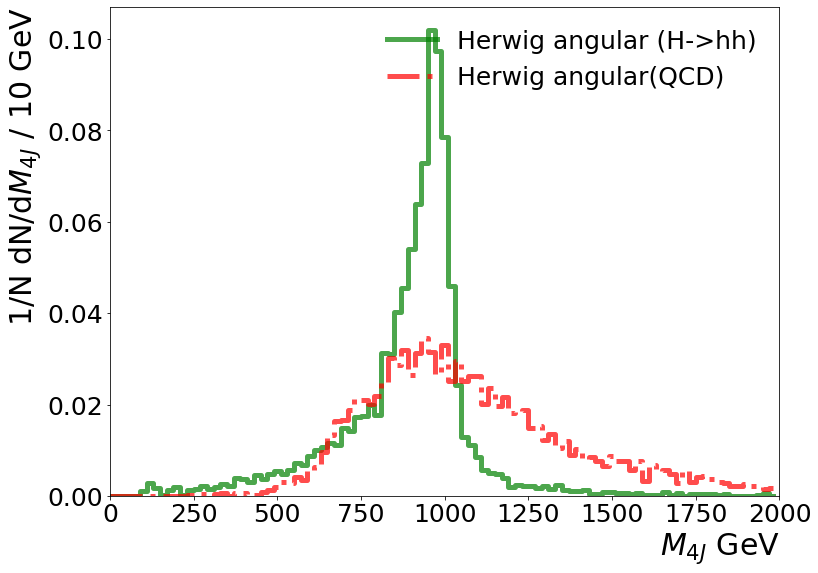

In [119]:
M_bbbb = Mhh

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(M_bbbb):
    length = np.linspace(0,2000,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,2000))
    plt.xlabel("$M_{4J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{4J}$ / 10 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show() 

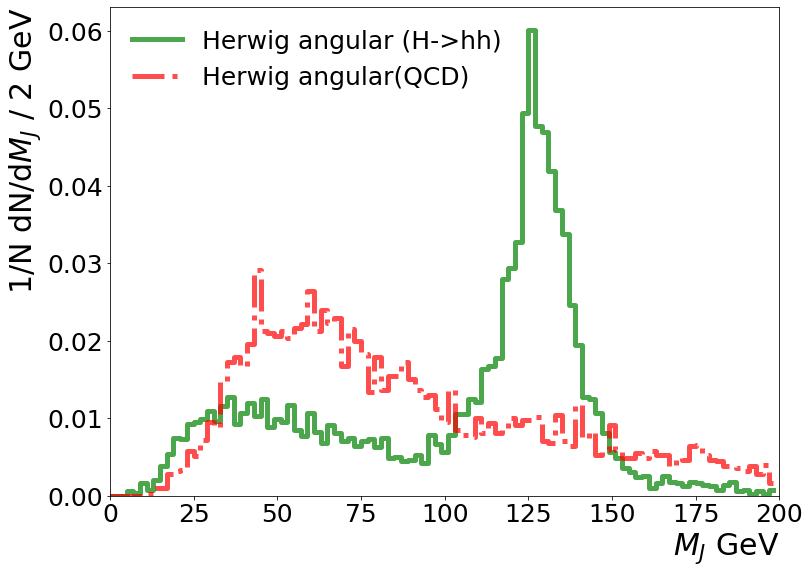

In [120]:
M_j = M_J1

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(M_j):
    length = np.linspace(0,200,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{J}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()    
    

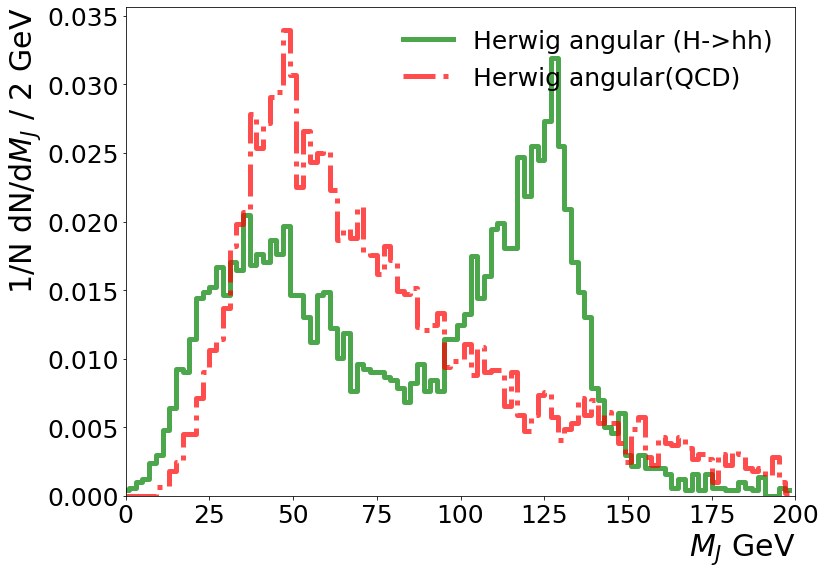

In [121]:
M_j = M_J2

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(M_j):
    length = np.linspace(0,200,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{J}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

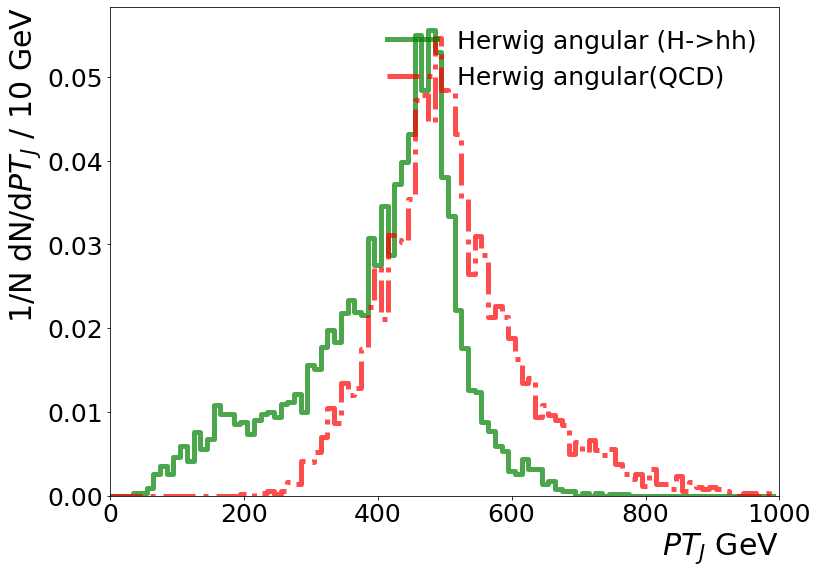

In [122]:
PT_j = PT_J1

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(PT_j):
    length = np.linspace(0,1000,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1000))
    plt.xlabel("$PT_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$PT_{J}$ / 10 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()    

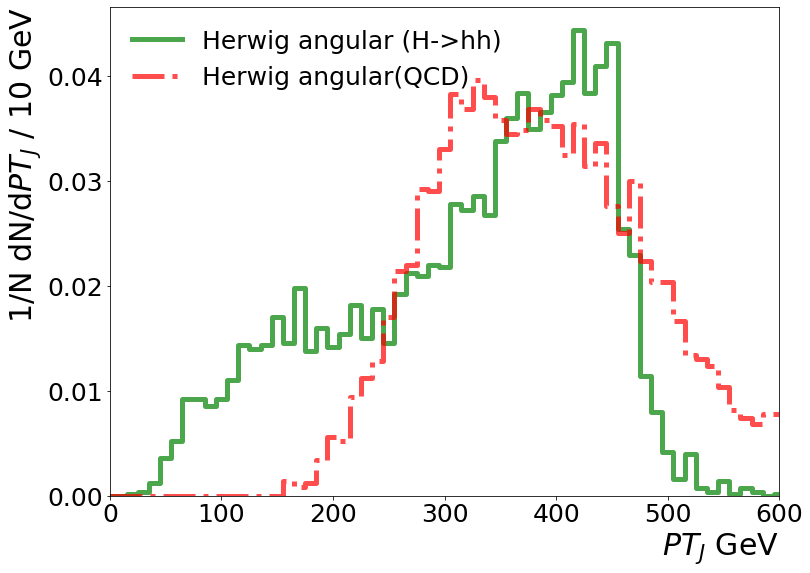

In [123]:
PT_j = PT_J2

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(PT_j):
    length = np.linspace(0,1000,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1000))
    plt.xlabel("$PT_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.xlim((0.,600))
plt.ylabel("1/N dN/d$PT_{J}$ / 10 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()   

# JSS

In [124]:
# import jet_trimming 
# import JSS 
from itertools import combinations


def jet_trim(jet0, pt_cut= 0.03, R1 = 0.2):
    # Define a cut threshold that the subjets have to meet (i.e. 3% of the original jet pT)
    jet0_max = jet0.pt
    jet0_cut = jet0_max*pt_cut

    # Grab the subjets by clustering with R1
    subjets = pyjet.cluster(jet0.constituents_array(), R=R1, p=1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
    subjet_array = subjets.inclusive_jets()
    j0 = []
    if (subjet_array[0].pt >= jet0_cut):
        for ij, subjet in enumerate(subjet_array):
            if subjet.pt < jet0_cut:
                # subjet doesn't meet the percentage cut on the original jet pT
                continue
            if subjet.pt >= jet0_cut:
                # Get the subjets pt, eta, phi constituents
                subjet_data = subjet.constituents_array()
                j0.append(subjet_data)
    else:
        j0 = subjet_array[0].constituents_array()*0
    jet = j0[0]
    for i, subjet in enumerate(j0):
        if i==0 :
            continue
        jet = np.append(jet, subjet)
        
    sequence = pyjet.cluster(jet, R=1.2, p=-1)
    jet = sequence.inclusive_jets()
    return jet



def CalcDeltaR(j1, j2):
    eta1 = j1.eta
    phi1 = j1.phi
    eta2 = j2.eta
    phi2 = j2.phi

    dEta = eta1-eta2
    dPhi = abs(phi1-phi2)
    if dPhi > np.pi:
        dPhi = 2*np.pi - dPhi

    dR = (dPhi**2 + dEta**2)**0.5

    return dR

def CalcDeltaRArray(p, a):
    dEta = p['eta'] - \
        a['eta'].repeat(p.shape[0]).reshape(a.shape[0], p.shape[0])
    dPhi = np.abs(p['phi'] - a['phi'].repeat(p.shape[0]
                                             ).reshape(a.shape[0], p.shape[0]))
    mask = dPhi > np.pi
    dPhi[mask] *= -1
    dPhi[mask] += 2 * np.pi
    return (dPhi**2 + dEta**2)**0.5

def t0(jet):
    return sum(p.pt * CalcDeltaR(p, jet) for p in jet.constituents())

def tn(jet, n): #t1 t2 t3 t21 t32
    assert n >= 0
    if n == 0:
        return t0(jet)
    particles = jet.constituents_array()
    if len(particles) < n:
        return -1
    subjets = pyjet.cluster(particles, R=1.0, p=1).exclusive_jets(n)
    subjets_array = [subjet.constituents_array() for subjet in subjets]
    wta_axes = [a[np.argmax(a['pT'])] for a in subjets_array]
    wta_axes = np.array(wta_axes, dtype=subjets_array[0].dtype)
    return np.sum(particles['pT']*CalcDeltaRArray(particles, wta_axes).min(axis=0)) / t0(jet)

def CalcEECorr(jet, n=1, beta=1.0):

    assert n == 2 or n == 3, 'fn must be in [2, 3] but is n'

    jet_particles = jet.constituents()

    if len(jet_particles) < n:
        return -1

    currentSum = 0

    if n == 2:
        for p1, p2 in combinations(jet_particles, 2):
            # get the terms of the triplet at hand
            pt1 = p1.pt
            pt2 = p2.pt
            dr12 = CalcDeltaR(p1, p2)

            # calculate the partial contribution
            thisterm = pt1*pt2 * (dr12)**beta

            # sum it up
            currentSum += thisterm

        eec = currentSum/(jet.pt)**2

    elif n == 3:
        dr = {(p1, p2): CalcDeltaR(p1, p2)
              for p1, p2 in combinations(jet_particles, 2)}
        for p1, p2, p3 in combinations(jet_particles, 3):
            # get the terms of the triplet at hand
            dr12 = dr[(p1, p2)]
            dr13 = dr[(p1, p3)]
            dr23 = dr[(p2, p3)]

            # calculate the partial contribution
            thisterm = p1.pt*p2.pt*p3.pt * (dr12*dr13*dr23)**beta

            # sum it up
            currentSum += thisterm

        eec = currentSum/(jet.pt)**3
    return eec

In [125]:
# ###################################################################################
  
# print("Selection and Trimming")
# print("\n")    
# print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
# ticks_1 = time.time()
    

# for i, element in enumerate(event_list_clustered):
#     for N in range(len(element)):

#         if len(element[N]) >= 2: # at least two jets in this event.
#             jet_1_untrimmed = element[N][0] #leading jet's information
#             jet_2_untrimmed = element[N][1] #subleading jet's information
        
#     #         if jet_1_untrimmed.pt < 300 or jet_1_untrimmed.pt > 500: 
#     #             continue

#             t1 = JSS.tn(jet_1_untrimmed, n=1)
#             t2 = JSS.tn(jet_1_untrimmed, n=2)
#             t21_untrimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_1_untrimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_1_untrimmed, n=3, beta=1.0)
#             d21_untrimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_untrimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_untrimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_untrimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J1[i].append(jet_1_untrimmed.mass)
#             PT_J1[i].append(jet_1_untrimmed.pt)
#             T21_1[i].append(t21_untrimmed)
#             D21_1[i].append(d21_untrimmed)
#             D22_1[i].append(d22_untrimmed)
#             C21_1[i].append(c21_untrimmed)
#             C22_1[i].append(c22_untrimmed)
            
            
#             t1 = JSS.tn(jet_2_untrimmed, n=1)
#             t2 = JSS.tn(jet_2_untrimmed, n=2)
#             t21_untrimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_2_untrimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_2_untrimmed, n=3, beta=1.0)
#             d21_untrimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_untrimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_untrimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_untrimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J2[i].append(jet_2_untrimmed.mass)
#             PT_J2[i].append(jet_2_untrimmed.pt)
#             T21_2[i].append(t21_untrimmed)
#             D21_2[i].append(d21_untrimmed)
#             D22_2[i].append(d22_untrimmed)
#             C21_2[i].append(c21_untrimmed)
#             C22_2[i].append(c22_untrimmed)
            
            

#             ## Jet Trimming
#             jet_1_trimmed = jet_trimming.jet_trim(jet_1_untrimmed)[0]   #trimming jet's information
#             jet_2_trimmed = jet_trimming.jet_trim(jet_2_untrimmed)[0]   #trimming jet's information

#     #         if jet_1_trimmed.pt < 300 or jet_1_trimmed.pt > 500: 
#     #             continue


#             t1 = JSS.tn(jet_1_trimmed, n=1)
#             t2 = JSS.tn(jet_1_trimmed, n=2)
#             t21_trimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_1_trimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_1_trimmed, n=3, beta=1.0)
#             d21_trimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_trimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_trimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_trimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J1_trimmed[i].append(jet_1_trimmed.mass)
#             PT_J1_trimmed[i].append(jet_1_trimmed.pt)
#             T21_1_trimmed[i].append(t21_trimmed)
#             D21_1_trimmed[i].append(d21_trimmed)
#             D22_1_trimmed[i].append(d22_trimmed)
#             C21_1_trimmed[i].append(c21_trimmed)
#             C22_1_trimmed[i].append(c22_trimmed)
            
            
#             t1 = JSS.tn(jet_2_trimmed, n=1)
#             t2 = JSS.tn(jet_2_trimmed, n=2)
#             t21_trimmed = t2 / t1 if t1 > 0.0 else 0.0

#             ee2 = JSS.CalcEECorr(jet_2_trimmed, n=2, beta=1.0)
#             ee3 = JSS.CalcEECorr(jet_2_trimmed, n=3, beta=1.0)
#             d21_trimmed = ee3/(ee2**3) if ee2>0 else 0
#             d22_trimmed = ee3**2/((ee2**2)**3) if ee2>0 else 0
#             c21_trimmed = ee3/(ee2**2) if ee2>0 else 0
#             c22_trimmed = ee3**2/((ee2**2)**2) if ee2>0 else 0 
            
#             M_J2_trimmed[i].append(jet_2_trimmed.mass)
#             PT_J2_trimmed[i].append(jet_2_trimmed.pt)
#             T21_2_trimmed[i].append(t21_trimmed)
#             D21_2_trimmed[i].append(d21_trimmed)
#             D22_2_trimmed[i].append(d22_trimmed)
#             C21_2_trimmed[i].append(c21_trimmed)
#             C22_2_trimmed[i].append(c22_trimmed)


# totaltime =  ticks_2 - ticks_1
# print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))


# ###################################################################################

In [126]:
path2 = "/home/u5/Universality_DiHiggs/Data_High_Level_Features/"

herwig_def_H = pd.read_csv(path2 + "herwig_ang_H_1.csv")
herwig_def_QCD = pd.read_csv(path2 + "herwig_ang_QCD_1.csv")
pythia_def_H = pd.read_csv(path2 + "pythia_def_H_1.csv")
pythia_def_QCD = pd.read_csv(path2 + "pythia_def_QCD_1.csv")
pythia_vin_H = pd.read_csv(path2 + "pythia_vin_H_1.csv")
pythia_vin_QCD = pd.read_csv(path2 + "pythia_vin_QCD_1.csv")
# pythia_dip = pd.read_csv(path2 + "pythia_dip_H_1.csv")
# pythia_dip = pd.read_csv(path2 + "pythia_dip_QCD_1_untrimmed.csv")

features = ["GEN","SHO","PRO",
            "MJJ_0",
            "MJ1_0","PTJ1_0","t211_0","D211_0","D221_0","C211_0","C221_0",
            "MJ2_0","PTJ2_0","t212_0","D212_0","D222_0","C212_0","C222_0",
            "MJJ",
            "MJ1","PTJ1","t211","D211","D221","C211","C221",
            "MJ2","PTJ2","t212","D212","D222","C212","C222",
            "eventindex"
           ]

In [127]:
def Combine(feature):

    feature_H = [herwig_def_H[feature],pythia_def_H[feature],pythia_vin_H[feature]]

    feature_QCD = [herwig_def_QCD[feature],pythia_def_QCD[feature],pythia_vin_QCD[feature]]

    H_QCD =  [herwig_def_H[feature],pythia_def_H[feature],pythia_vin_H[feature],
              herwig_def_QCD[feature],pythia_def_QCD[feature],pythia_vin_QCD[feature]
             ]
    
    return feature_H, feature_QCD, H_QCD

In [128]:
def HIST(process, length, title, colors, linestyle,xpo=1,ypo=1):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='mid',linewidth=5, alpha=0.7, label=title[i])
#     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
# title = ["Herwig Angular", "Pythia default", "Pythia vincia", "Pythia dipole", "Sherpa", 
#          "Herwig Angular QCD", "Pythia default QCD", "Pythia vincia QCD", "Pythia dipole QCD","Sherpa QCD"]
# colors = ["green","red","darkred","blue","magenta",
#           "cyan","orange","darkred","darkblue","darkgreen"]
# linestyle = ["-","-.","--",":","X",
#              "D","s","^","H","h","*"]
# colors = ["green","red","darkred","blue","magenta"]
# linestyle = ["-","-.","--",":","X"]

title = ["Herwig angular (H->hh)","Pythia default (H->hh)","Pythia vincia (H->hh)",#"Pythia dipole (H->hh)",
         "Herwig angular(QCD)", "Pythia default(QCD)", "Pythia vincia(QCD)" #, "Pythia dipole(QCD)"
        ]
colors = ["green","red","blue",#"purple",
          "cyan","black","Orange"#,"lightblue"
         ]


linestyle = ["-","-.",":",#"--",
             "--","--",":"#,":"
            ]



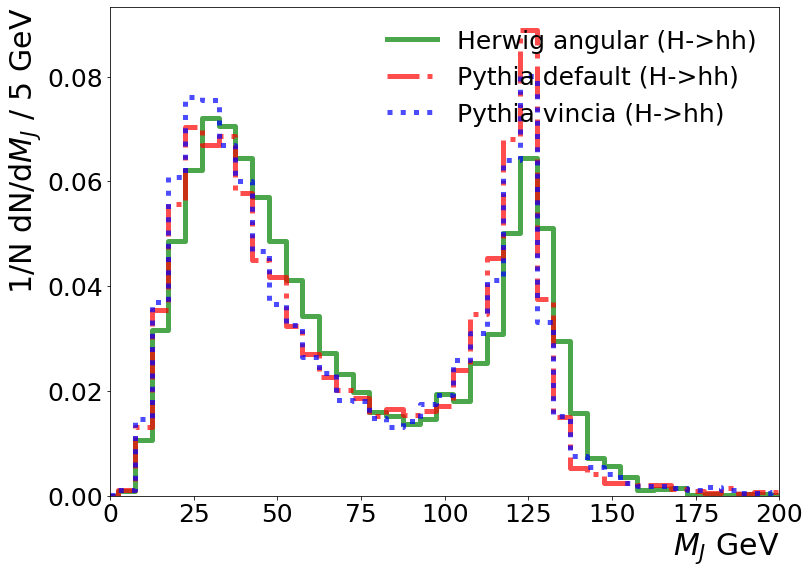

In [129]:
Mjj= Combine("MJ1_0")[0]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(Mjj):
    length = np.linspace(0,1000,201)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{J}$ / 5 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

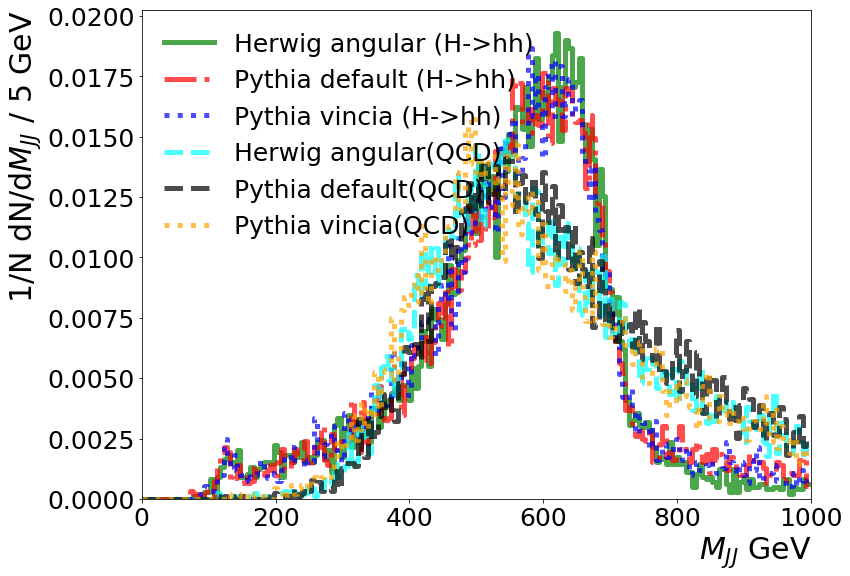

In [130]:
Mjj= Combine("MJJ_0")[2]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(Mjj):
    length = np.linspace(0,1000,201)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1000))
    plt.xlabel("$M_{JJ}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{JJ}$ / 5 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

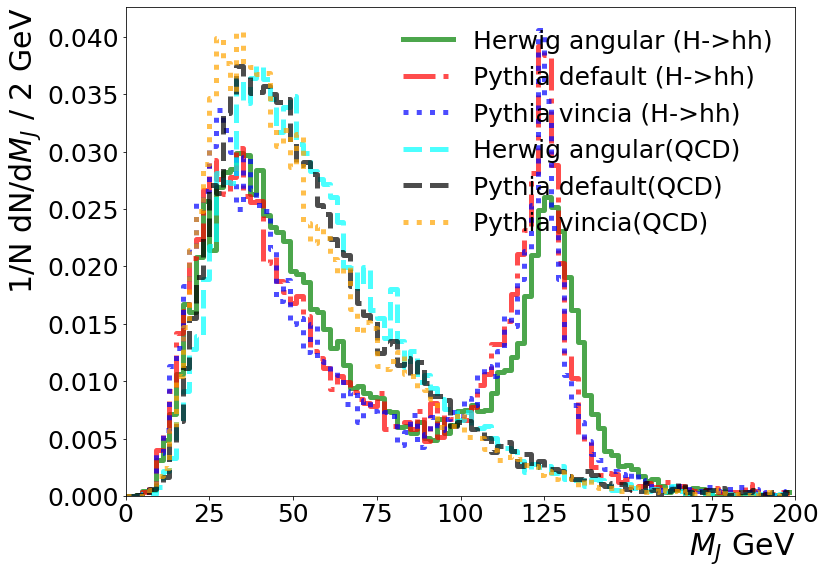

In [131]:
M_j = Combine("MJ1_0")[2]


fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(M_j):
    length = np.linspace(0,200,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{J}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  

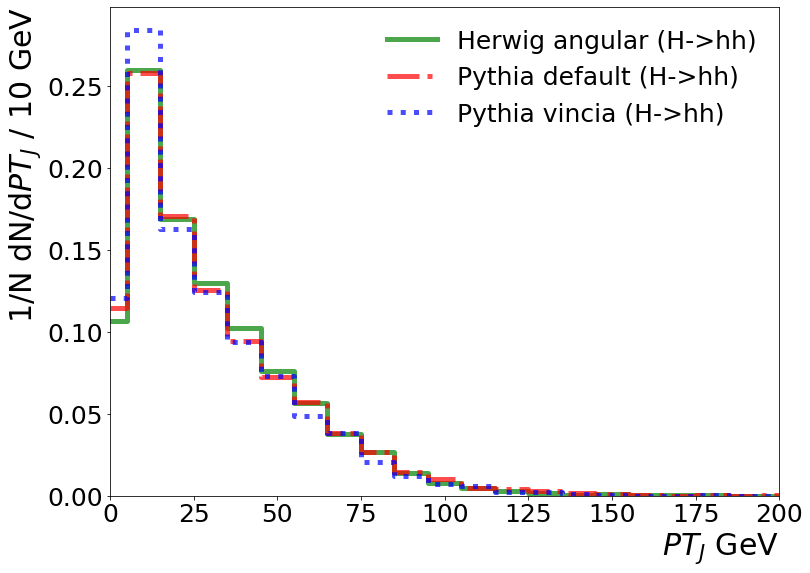

In [132]:
PT_j =  Combine("MJ2")[1]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(PT_j):
    length = np.linspace(0,1000,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$PT_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$PT_{J}$ / 10 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show() 

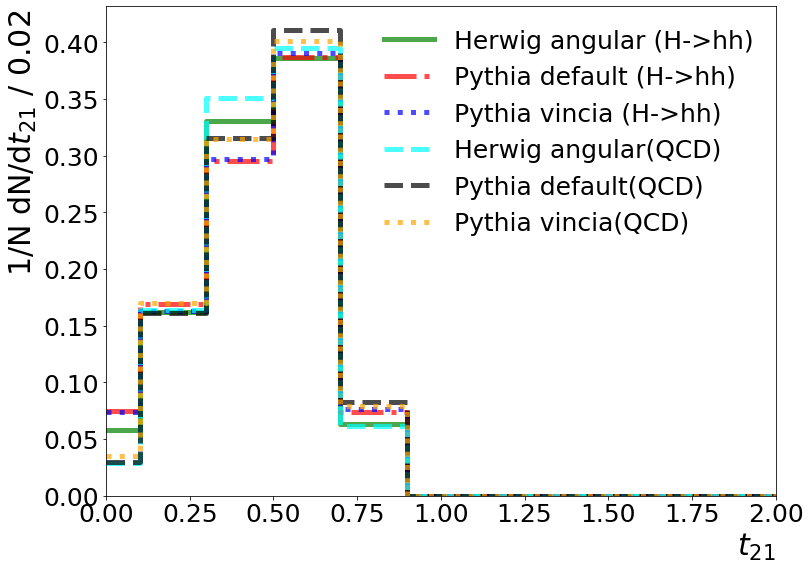

In [133]:
T21 = Combine("t212")[2]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(T21):
    length = np.linspace(0,100,501)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,2))
    plt.xlabel("$t_{21}$", fontsize=30,horizontalalignment='right',x=1) 

    
plt.ylim((0.))
plt.ylabel("1/N dN/d$t_{21}$ / 0.02 ", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()  